# Synthèse de ce qui a été vu jusqu'à présent



On a pris en main python et les librairies scientifiques de bases.

Accent particulier sur 
- NumPy : pour la manipulation simple et rapide des données 
- Matplotlib : pour la visualisation
- Scikit Learn : Nous avons utilisé le module de régression linéaire

Nous avons pris connaissance de quelques propriétés fondamentales de la distribution gaussienne (ou normale), qui joue un rôle important à cause du théorème central limit.

Nous avons introduit le modèle de régression linéaire, en rappelant les hypothèses de bases :
* les erreurs suivent une loi normale de moyenne nulle
* la variance est la même pour tous (homoscédasticité) : la variance est la même pour l'ensemble des termes d'erreures gaussiens
$Var(\epsilon_i)=\sigma$
* les termes d'erreurs pour les différents $x_i$ sont indépendants les uns des autres

et montrer comment calculer les coefficients optimaux qui expliquent au mieux les données

Nous avons introduit le coefficient R2, qui est un outil de diagnostique de la régression.


# Exemple pratique de régression linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Trouvez comment lire un csv avec numpy, et ouvrez le fichier `x01.txt` dans le même répetoire que ce notebook.

Notez qu'il faut ignorer les 33 premières lignes du fichier, qui sont des commentaires.

In [6]:
data = np.loadtxt("x01.txt", skiprows=33)

Représentez graphiquement les données avec `matplotlib`

In [7]:
data.shape

(62, 3)

In [10]:
data[:,1].shape

(62,)

In [11]:
X = data[:,1]
y = data[:,2]

In [13]:
X

array([  3.38500000e+00,   4.80000000e-01,   1.35000000e+00,
         4.65000000e+02,   3.63300000e+01,   2.76600000e+01,
         1.48300000e+01,   1.04000000e+00,   4.19000000e+00,
         4.25000000e-01,   1.01000000e-01,   9.20000000e-01,
         1.00000000e+00,   5.00000000e-03,   6.00000000e-02,
         3.50000000e+00,   2.00000000e+00,   1.70000000e+00,
         2.54700000e+03,   2.30000000e-02,   1.87100000e+02,
         5.21000000e+02,   7.85000000e-01,   1.00000000e+01,
         3.30000000e+00,   2.00000000e-01,   1.41000000e+00,
         5.29000000e+02,   2.07000000e+02,   8.50000000e+01,
         7.50000000e-01,   6.20000000e+01,   6.65400000e+03,
         3.50000000e+00,   6.80000000e+00,   3.50000000e+01,
         4.05000000e+00,   1.20000000e-01,   2.30000000e-02,
         1.00000000e-02,   1.40000000e+00,   2.50000000e+02,
         2.50000000e+00,   5.55000000e+01,   1.00000000e+02,
         5.21600000e+01,   1.05500000e+01,   5.50000000e-01,
         6.00000000e+01,

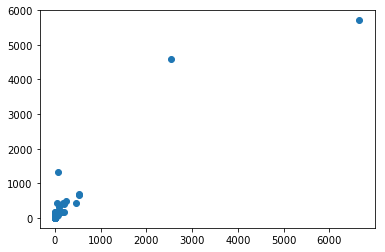

In [12]:
plt.scatter(X,y)

Utilisez `sklearn` pour faire le fit et calculer les coefficients de la régression

Avec la librairie sklearn, il faut transformer le vecteur X en entrée, en passant d'une liste de nombres à une liste de feature vectors (liste de liste), même si il n'y a qu'un seul élément dans notre feature vector.

```
[[],
 [],
 [],
 ...
 []]
```

Il est en effet plutôt rare de n'avoir qu'un seul élément en entrée.

In [15]:
from sklearn import linear_model
x = X.reshape(-1,1)
y = y.reshape(-1,1)

In [22]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
regr.coef_, regr.intercept_

(array([[ 0.96649637]]), array([ 91.00439621]))

Calculez le coefficient $R^2$

In [28]:
regr.score(x,y)

0.87266208430433312

In [29]:
from sklearn.metrics import r2_score

r2_score(x,y)

0.85362906113701476

Représentez la droite correspondant à la régression superposée aux  données

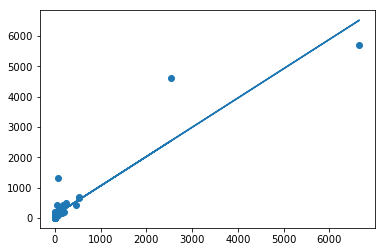

In [37]:
plt.scatter(x, y)
plt.plot(x, regr.predict(x))
plt.show()

Ce modèle semble fonctionner, mais est-ce le meilleur modèle possible ? 

Un bon réflexe pour diagnostiquer une régression linéaire consiste à regarder les résidus. Ils sont sensé correspondre à des erreurs gaussiennes.

Calculez les résidus et représenter la distribution.

In [ ]:
residus = y - regr.predict(x)

On va refaire l'exercice en transformant les variables avec une fonction logarithme. Pourquoi selon vous ?

Refaites l'exercice de la régression linéaire

Que vaut le nouveau $R^2$ ?

Regardons la représentation graphique des données et de la régression

Regardons les résidus pour le nouveau modèle